In [170]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [171]:
#Function that returns the value of function given a vector
def func(x):
    val = (x[1]-x[0])**4 + 8*x[0]*x[1] - x[0] + x[1] + 3
    return val

In [172]:
# Analytically defined function to calculate gradient of function at a given point
def gradient(x):
    grad = np.zeros(2)
    grad[0] = -4*(x[1]-x[0])**3 + 8*x[1] -1
    grad[1] = 4*(x[1]-x[0])**3 + 8*x[0] +1
    return grad.reshape((2,1))

In [173]:
#Norm of a two dimensional vector
def norm(x):
    val = x[0]**2 + x[1]**2
    return val

In [174]:
#Function that returns hessian matrix
def hessian(x):    
    val = np.array([[0,0],
                    [0,0]])
    val[0][0] = 12*(x[1]-x[0])**2
    val[1][1] = 12*(x[1]-x[0])**2
    val[0][1] = 8-12*(x[1]-x[0])**2
    val[1][0] = val[0][1]
    return val

# Newton's Method With Full Step

In [183]:
#Parameters
x0 = np.array([1.5,1.5]).reshape((2,1))
maxiter = 15000
tol = 10**-6

In [184]:
#Implementing newton's method with full step
def newton_fullstep(x0,maxiter,tol):
    i = 0
    x = x0
    X = {0:[x0, func(x0)]}
    while i<maxiter and norm(gradient(x))>tol:
        if(np.linalg.det(hessian(x)) == 0):
            break
        x = x - (np.linalg.inv(hessian(x)).dot(gradient(x)))
        i = i+1
        X[i] = [x,func(x)]
    print('Converged value of x is', np.transpose(x))
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', np.transpose(gradient(x)))
    if i==maxiter:
        print('Maximum iterations reached but convergence did not happen')
    return X

In [185]:
newton_fs = newton_fullstep(x0,maxiter,tol)

Converged value of x is [[-0.13470624  0.13470624]]
Corresponding value of f(x) is  [3.12951462]
Corresponding value of grad(x) is  [[-0.00056922  0.00056922]]


# Newton's Method with Inexact Line Search

In [186]:
# Function to backtrack value of alpha for given parameters
def backtracking_newton(alpha_in, rho, c, x, iterlim):
    i = 0
    alpha = alpha_in
    while (func(x - alpha*(np.linalg.inv(hessian(x)).dot(gradient(x)))) > func(x) - c*alpha*np.dot(np.transpose(gradient(x)),(np.linalg.inv(hessian(x)).dot(gradient(x))))) and (i<iterlim):
        alpha = alpha*rho
        i = i+1
    return alpha

In [187]:
#Parameters
alpha_in = 5
rho = 0.8
c = 0.1
iterlim = 15000
x0 = np.array([1.5,1.5]).reshape((2,1))
maxiter = 15000
tol = 10**-6

In [188]:
#Functional implementation of Newton's Method with Inexact LineSearch
def Netwon_inexact(x0,maxiter,tol,alpha_in,rho,c,iterlim):
    i = 0
    x = x0
    X = {0:[x0, func(x0)]}
    while i<maxiter and norm(gradient(x))>tol:
        if(np.linalg.det(hessian(x)) == 0):
            break
        alpha = backtracking_newton(alpha_in, rho, c, x, iterlim)    
        x = x - alpha*(np.linalg.inv(hessian(x)).dot(gradient(x)))
        i = i+1 
        X[i] = [x,func(x)]
    print('Converged value of x is', np.transpose(x))
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', np.transpose(gradient(x)))
    if i==iterlim:
        print('Maximum iterations reached but convergence did not happen')
    return X   

In [189]:
newton_inexact = Netwon_inexact(x0,maxiter,tol,alpha_in,rho,c,iterlim)

Converged value of x is [[-0.13485242  0.13474201]]
Corresponding value of f(x) is  [3.12951469]
Corresponding value of grad(x) is  [[-0.00044164 -0.00044164]]


# BFGS Update

In [190]:
# Function to backtrack value of alpha for given parameters
def backtracking_bfgs(alpha_in, rho, c, x, iterlim,C):
    i = 0
    alpha = alpha_in
    while (func(x - alpha*C.dot(gradient(x))) > func(x) - c*alpha*np.dot(np.transpose(gradient(x)),C.dot(gradient(x)))) and (i<iterlim):
        alpha = alpha*rho
        i = i+1
    return alpha

In [191]:
#Paramters
alpha_in = 5
rho = 0.8
c = 0.1
iterlim = 15000
maxiter = 15000
tol = 10**-6
C0 = np.identity(2)
x0 = np.array([1.5,1.5]).reshape((2,1))

In [192]:
#Functional implementation of BFGS update for hessian inverse
def BFGS_update(x0,C0,maxiter,tol,alpha_in,rho,c,iterlim):
    grad_prev = gradient(x0)
    x_prev = x0
    i = 0
    C = C0
    X = {0:[x0, func(x0)]}
    while i<maxiter and norm(gradient(x_prev))>tol:
        alpha = backtracking_bfgs(alpha_in, rho, c, x_prev, iterlim,C)    
        x = x_prev - alpha*(C.dot(gradient(x_prev)))
        y = gradient(x) - gradient(x_prev)
        s = x - x_prev
        I = np.identity(2)
        yt = np.transpose(y)
        st = np.transpose(s)
        C = (I - s.dot(yt)/yt.dot(s)).dot(C).dot(I - y.dot(st)/yt.dot(s)) + s.dot(st)/yt.dot(s)
        x_prev = x
        i = i+1 
        X[i] = [x,func(x)]
    print('Converged value of x is', np.transpose(x))
    print('Corresponding value of f(x) is ', func(x))
    print('Corresponding value of grad(x) is ', np.transpose(gradient(x)))
    if i==iterlim:
        print('Maximum iterations reached but convergence did not happen')
    return X      

In [193]:
bfgs = BFGS_update(x0,C0,maxiter,tol,alpha_in,rho,c,iterlim)

Converged value of x is [[ 0.55364523 -0.55352242]]
Corresponding value of f(x) is  [0.94382715]
Corresponding value of grad(x) is  [[0.00057456 0.00040796]]


# Plotting 

In [194]:
newton_fs_x = np.array(list(newton_fs.keys()))
nfs_x1_val = []
nfs_x2_val = []
nfs_fx_val = []
for i in newton_fs_x:
    nfs_x1_val.append(float(newton_fs[i][0][0]))
    nfs_x2_val.append(float(newton_fs[i][0][1]))
    nfs_fx_val.append(float(newton_fs[i][1]))

In [195]:
newton_in_x = np.array(list(newton_inexact.keys()))
nin_x1_val = []
nin_x2_val = []
nin_fx_val = []
for i in newton_in_x:
    nin_x1_val.append(float(newton_inexact[i][0][0]))
    nin_x2_val.append(float(newton_inexact[i][0][1]))
    nin_fx_val.append(float(newton_inexact[i][1]))

In [196]:
bfgs_x = np.array(list(bfgs.keys()))
bfgs_x1_val = []
bfgs_x2_val = []
bfgs_fx_val = []
for i in bfgs_x:
    bfgs_x1_val.append(float(bfgs[i][0][0]))
    bfgs_x2_val.append(float(bfgs[i][0][1]))
    bfgs_fx_val.append(float(bfgs[i][1]))

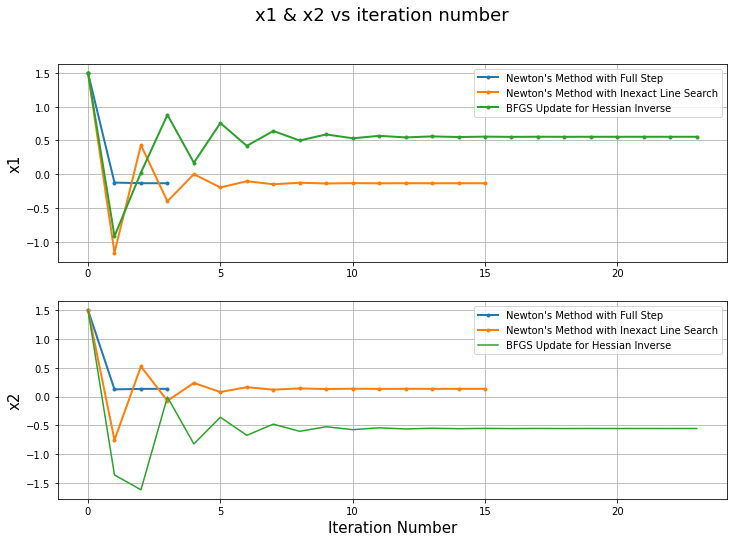

In [197]:
fig, axs = plt.subplots(2)
fig.set_size_inches(12,8)

fig.suptitle('x1 & x2 vs iteration number', fontsize = 18)
#subplot 1
axs[0].plot(newton_fs_x, nfs_x1_val,marker='.', linewidth = 2)
axs[0].plot(newton_in_x, nin_x1_val,marker='.', linewidth = 2)
axs[0].plot(bfgs_x, bfgs_x1_val,marker='.', linewidth = 2)
axs[0].grid()
axs[0].set_ylabel('x1', fontsize = 15)
axs[0].legend(['Newton\'s Method with Full Step','Newton\'s Method with Inexact Line Search','BFGS Update for Hessian Inverse'])

#subplot 2
axs[1].plot(newton_fs_x, nfs_x2_val,marker='.', linewidth = 2)
axs[1].plot(newton_in_x, nin_x2_val,marker='.', linewidth = 2)
axs[1].plot(bfgs_x, bfgs_x2_val,)
axs[1].grid()
axs[1].set_ylabel('x2', fontsize = 15)
axs[1].legend(['1','2','1'])
axs[1].legend(['Newton\'s Method with Full Step','Newton\'s Method with Inexact Line Search','BFGS Update for Hessian Inverse'])

plt.xlabel('Iteration Number', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'f(x) vs Iteration Number')

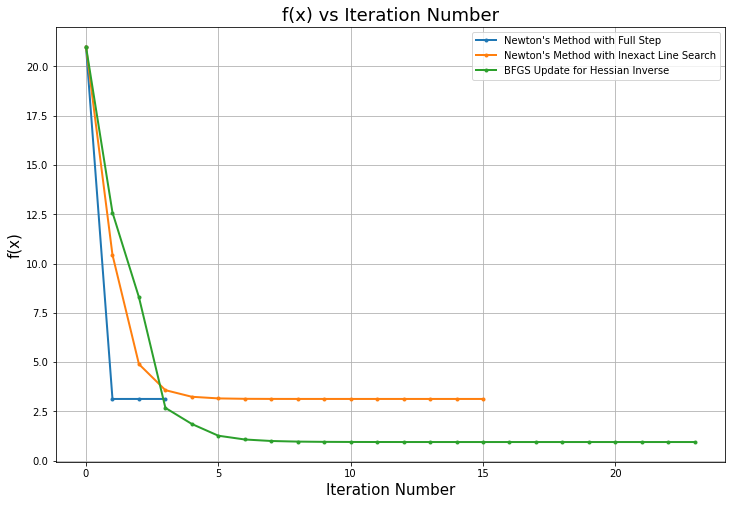

In [198]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 8)
plt.plot(newton_fs_x,nfs_fx_val, marker='.', linewidth = 2)
plt.plot(newton_in_x,nin_fx_val, marker='.', linewidth = 2)
plt.plot(bfgs_x,bfgs_fx_val, marker='.', linewidth = 2)
plt.grid()
plt.legend(['Newton\'s Method with Full Step','Newton\'s Method with Inexact Line Search','BFGS Update for Hessian Inverse'])
plt.xlabel('Iteration Number', fontsize = 15)
plt.ylabel('f(x)', fontsize = 15)
plt.title('f(x) vs Iteration Number', fontsize = 18)